In [1]:
import itertools
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
import pandas_datareader as web

In [2]:
#let's start by getting dates for our dataframe
end = dt.date.today()
start = dt.date(end.year - 10, end.month, end.day)

In [3]:
#we'll start with using S&P 500 which use the ticker ^GSPC
spx = yf.download("^GSPC", start, end)
spx.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-17,1290.219971,1303.000000,1290.219971,1293.670044,1293.670044,4010490000
2012-01-18,1293.650024,1308.109985,1290.989990,1308.040039,1308.040039,4096160000
2012-01-19,1308.069946,1315.489990,1308.069946,1314.500000,1314.500000,4465890000
2012-01-20,1314.489990,1315.380005,1309.170044,1315.380005,1315.380005,3912620000
2012-01-23,1315.290039,1322.280029,1309.890015,1316.000000,1316.000000,3770910000


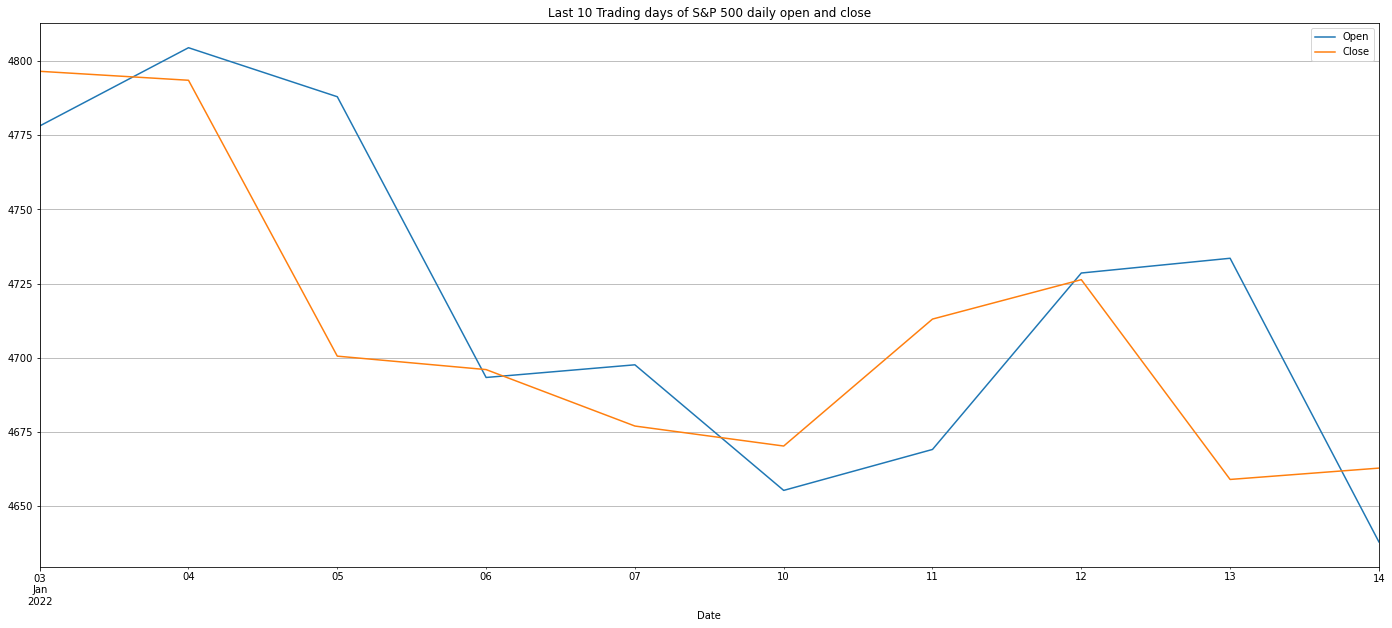

In [4]:
#let's first look at what we are given open and close is the price of the stock when it opens and closes with the market
spx[["Open", "Close"]].tail(10).plot(figsize = (24,10))
plt.title("Last 10 Trading days of S&P 500 daily open and close")
plt.grid()
plt.show()

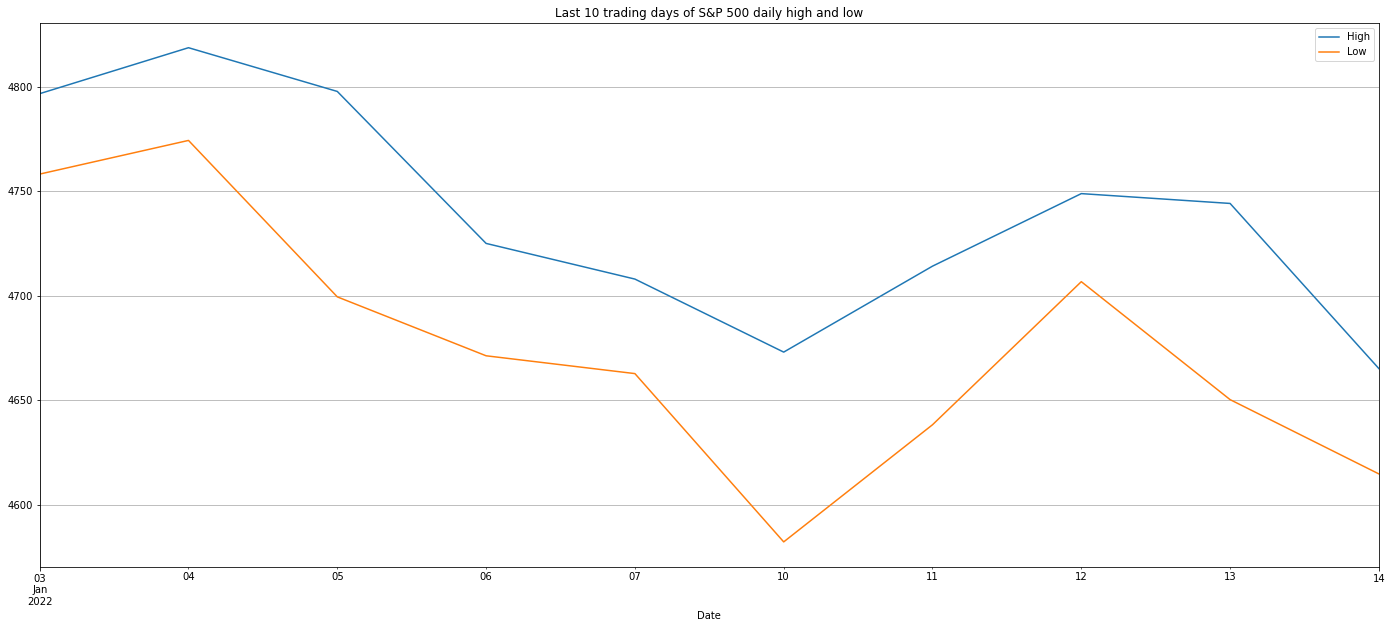

In [5]:
#we can also look at the high and the low which is the 
spx[["High", "Low"]].tail(10).plot(figsize = (24,10))
plt.title("Last 10 trading days of S&P 500 daily high and low")
plt.grid()
plt.show()

[*********************100%***********************]  1 of 1 completed


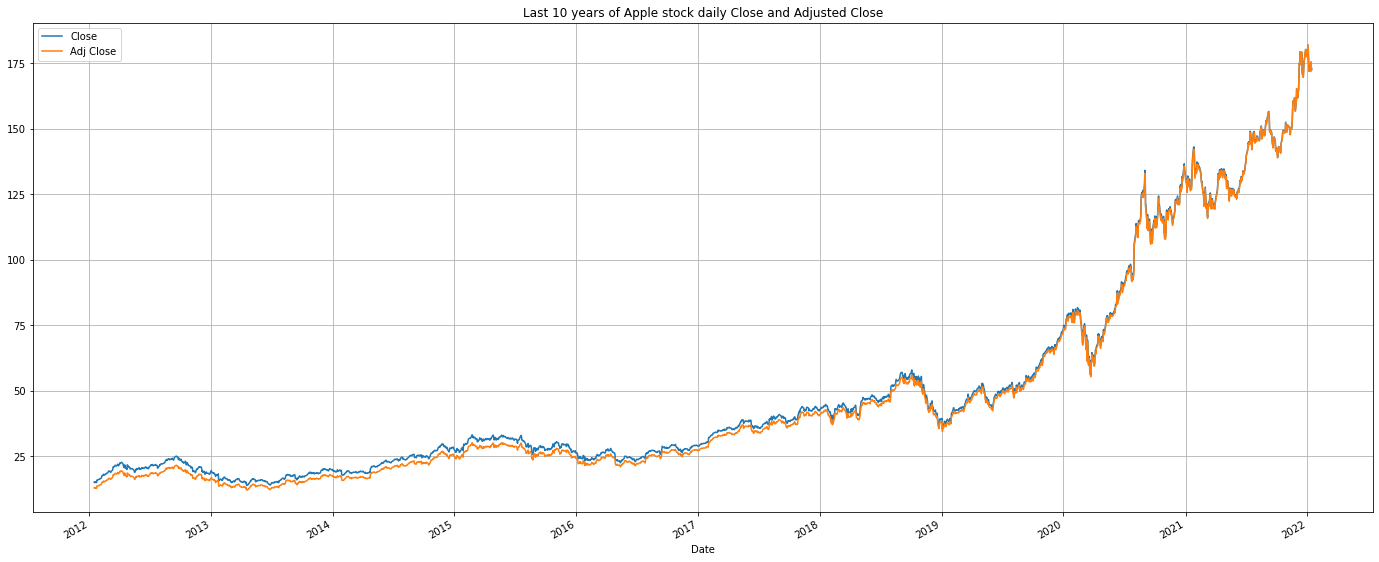

In [6]:
#let's compare adjusted close with close, in this case I'll use a stock 
yf.download("aapl", start, end)[["Close", "Adj Close"]].plot(figsize = (24,10))
plt.title("Last 10 years of Apple stock daily Close and Adjusted Close")
plt.grid()
plt.show()

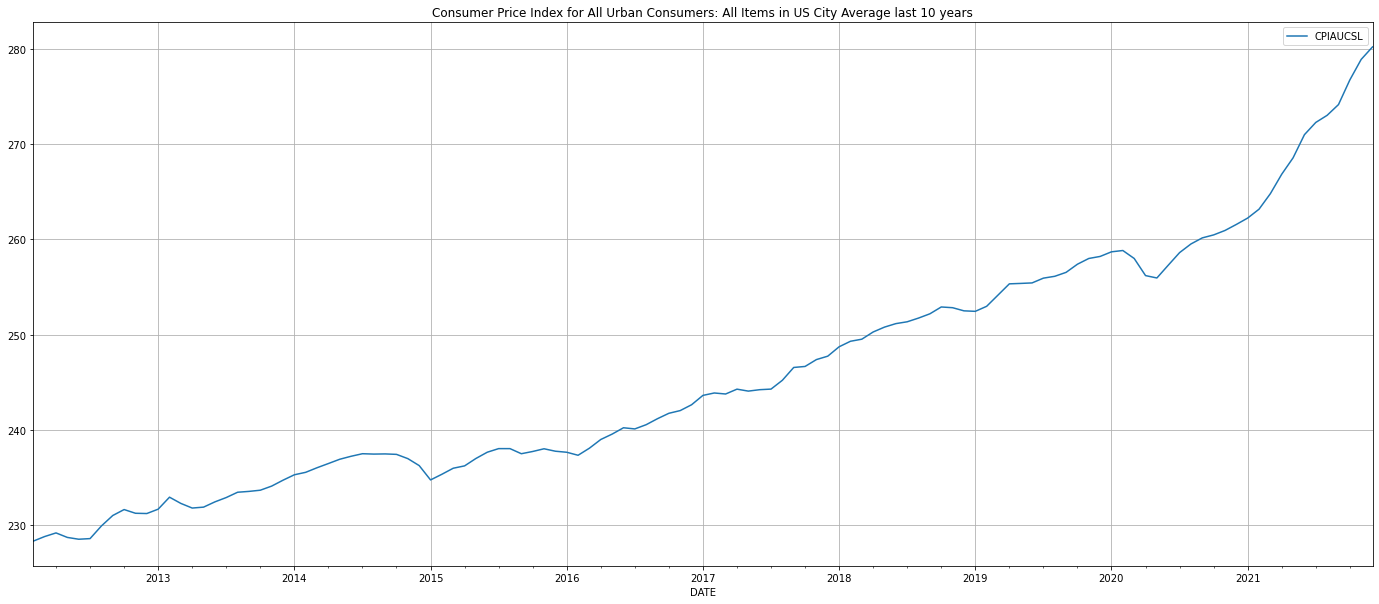

In [7]:
#let's work with pandas_datareader this allows us to pull from other sources such as IMF, OECD, and FRED
#Let's get the CPI rate from FRED

cpi = web.DataReader("CPIAUCSL", "fred", start, end)
cpi.plot(figsize = (24,10))
plt.title("Consumer Price Index for All Urban Consumers: All Items in US City Average last 10 years")
plt.grid()
plt.show()

In [8]:
def colorado_cut():
    
    read_obj = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")
    df = read_obj[0]
    
    city = []
    state = []
    
    for i in df["Headquarters Location"]:
        
        i = i.split(",")
        city.append(i[0])
        state.append(i[1])
        
    data_dict = {"Symbol": df["Symbol"], "City": city, "State": state}
    output_df = pd.DataFrame(data = data_dict)
    
    for index, i in enumerate(output_df["State"]):
        
        if i.replace(" ", "") != "Colorado":
            output_df = output_df.drop(index)
            
            
    return output_df

In [9]:
# this will return us with the colorado companies
df = colorado_cut()

In [10]:
#now we can get all of the stocks by passing the values as a list
df["Symbol"]

59      BLL
140     DVA
151    DISH
334     NEM
456     UDR
473     VFC
Name: Symbol, dtype: object

In [11]:
prices = yf.download(df["Symbol"].to_list(), start, end)["Adj Close"]
prices.head()

[*********************100%***********************]  6 of 6 completed


,BLL,DISH,DVA,NEM,UDR,VFC
Date,,,,,,
2012-01-17,17.024654,28.313940,39.365002,49.844727,17.513321,24.881508
2012-01-18,17.276773,28.275019,39.224998,49.362137,17.719780,24.994028
2012-01-19,17.487638,29.179897,39.875000,48.748688,17.570272,24.960276
2012-01-20,17.377617,28.080423,39.884998,48.478771,17.491962,25.042797
2012-01-23,17.322611,27.856634,40.220001,48.470589,17.484842,24.817741


In [12]:
prices.to_csv("colorado_companies.csv")

In [13]:
#let's simulate a portfolio in this case we are going to evenly invest the money

#start an allocation array 
allocation_array = [1 / len(prices.columns) for i in range(len(prices.columns))]
allocation_array

[0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666]

In [14]:
#then multiply the returns by the allocation array
portfolio_return = prices.pct_change().dropna() * allocation_array
portfolio_return.head()

,BLL,DISH,DVA,NEM,UDR,VFC
Date,,,,,,
2012-01-18,0.002468,-0.000229,-0.000593,-0.001614,0.001965,0.000754
2012-01-19,0.002034,0.005334,0.002762,-0.002071,-0.001406,-0.000225
2012-01-20,-0.001049,-0.006280,0.000042,-0.000923,-0.000743,0.000551
2012-01-23,-0.000528,-0.001328,0.001400,-0.000028,-0.000068,-0.001498
2012-01-24,-0.000176,0.001281,0.000891,-0.005006,0.003325,0.000290


In [15]:
portfolio_return["total_return"] = portfolio_return.sum(axis = 1)
portfolio_return.head()

,BLL,DISH,DVA,NEM,UDR,VFC,total_return
Date,,,,,,,
2012-01-18,0.002468,-0.000229,-0.000593,-0.001614,0.001965,0.000754,0.002751
2012-01-19,0.002034,0.005334,0.002762,-0.002071,-0.001406,-0.000225,0.006427
2012-01-20,-0.001049,-0.006280,0.000042,-0.000923,-0.000743,0.000551,-0.008401
2012-01-23,-0.000528,-0.001328,0.001400,-0.000028,-0.000068,-0.001498,-0.002050
2012-01-24,-0.000176,0.001281,0.000891,-0.005006,0.003325,0.000290,0.000604


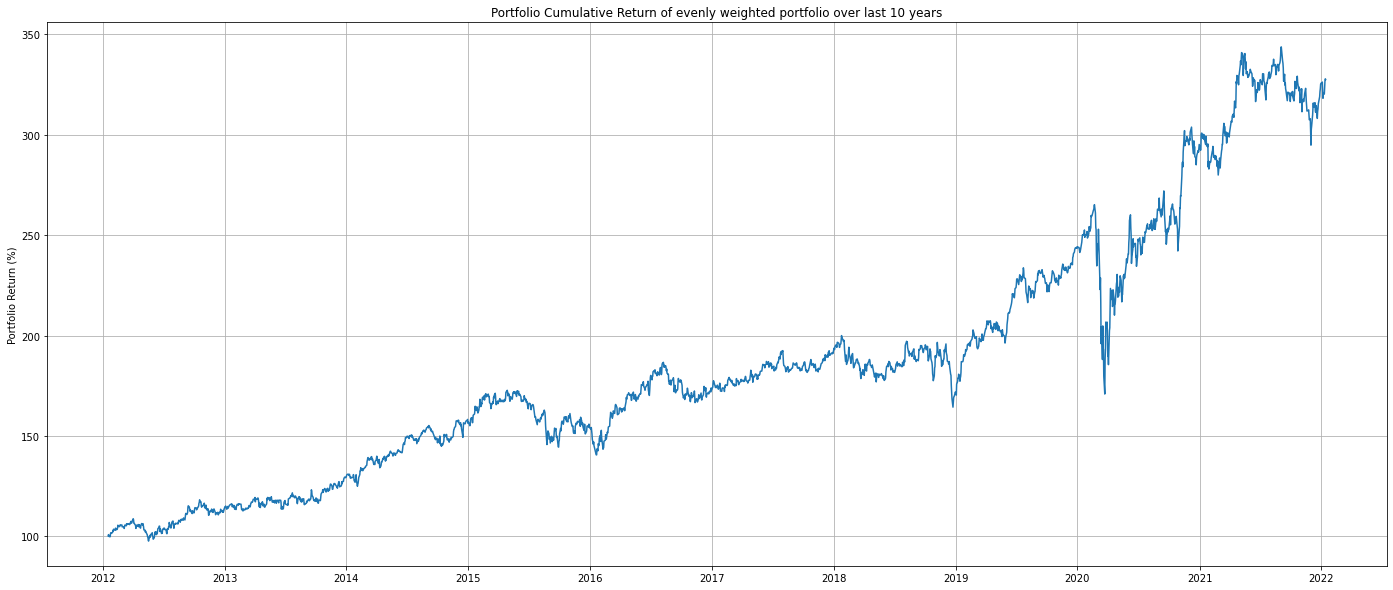

In [16]:
plt.figure(figsize = (24,10))
plt.plot((portfolio_return["total_return"] + 1).cumprod() * 100)
plt.title("Portfolio Cumulative Return of evenly weighted portfolio over last 10 years")
plt.ylabel("Portfolio Return (%)")
plt.grid()
plt.show()

In [17]:
#let's start by keeping track of the portfolio value

#instead of multiplying the returns by the allocation size we'll multiply the stock by the number of shares
#to find the number of shares we need to find how many we are going to buy

starting_capital = 100000
share_array = []

#we want to loop through each column get the amount of starting cash and divide by first share price
for i in prices.columns:
    share_array.append((starting_capital / len(prices.columns)) / prices[i][0])
    
#we are going to get something that is impossible because we end up with fractional shares
share_array

[978.9723941765066,
 588.6381986499881,
 423.38793232628177,
 334.3717142427983,
 951.656555606186,
 669.8415044368721]

In [18]:
#let's multiply the share price by the number of shares and then get the total value
portfolio_value = prices * share_array
portfolio_value["sum"] = portfolio_value.sum(axis = 1)
portfolio_value.head()

,BLL,DISH,DVA,NEM,UDR,VFC,sum
Date,,,,,,,
2012-01-17,16666.666667,16666.666667,16666.666667,16666.666667,16666.666667,16666.666667,100000.000000
2012-01-18,16913.484271,16643.756070,16607.390999,16505.302314,16863.144771,16742.037379,100275.115803
2012-01-19,17119.915305,17176.402188,16882.593802,16300.182288,16720.864957,16719.428593,100919.387132
2012-01-20,17012.207204,16529.209821,16886.826970,16209.929834,16646.340720,16774.704877,100059.219426
2012-01-23,16958.357822,16397.478941,17028.663155,16207.193829,16639.564799,16623.953232,99855.211778


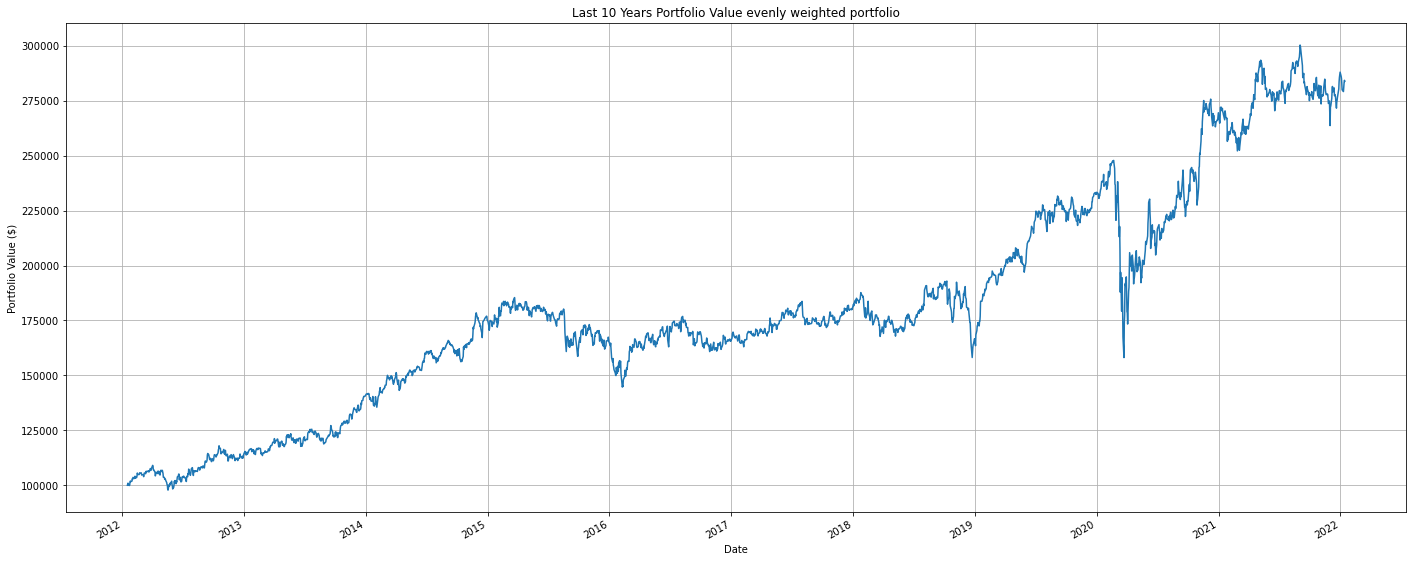

In [19]:
portfolio_value["sum"].plot(figsize = (24,10))
plt.title("Last 10 Years Portfolio Value evenly weighted portfolio")
plt.grid()
plt.ylabel("Portfolio Value ($)")
plt.show()

In [20]:
#let's compare values
print("final portfolio value:", portfolio_value["sum"][len(portfolio_value) - 1])
print("final return value:", (portfolio_return["total_return"] + 1).cumprod()[len(portfolio_return) - 1] * 100000) 

final portfolio value: 283850.73358272493
final return value: 327490.58463238634


In [21]:
#you can see we have a problem because they are off, actually they are off by too much 

#let's fix that by finding the value of the portfolio using just the close price
prices = yf.download(df["Symbol"].to_list(), start, end)["Close"]
prices.head()

[*********************100%***********************]  6 of 6 completed


,BLL,DISH,DVA,NEM,UDR,VFC
Date,,,,,,
2012-01-17,18.570000,29.100000,39.365002,60.939999,24.600000,31.231169
2012-01-18,18.844999,29.059999,39.224998,60.349998,24.889999,31.372412
2012-01-19,19.075001,29.990000,39.875000,59.599998,24.680000,31.330038
2012-01-20,18.955000,28.860001,39.884998,59.270000,24.570000,31.433617
2012-01-23,18.895000,28.629999,40.220001,59.259998,24.559999,31.151131


In [22]:
portfolio_return = prices.pct_change().dropna() * allocation_array
portfolio_return["total_return"] = portfolio_return.sum(axis = 1)
print((portfolio_return["total_return"] + 1).cumprod()[len(portfolio_return) - 1] * 100000)

282814.5895486581


In [23]:
#so you may ask yourself where do we get the portfolio with $323,000 that comes from reinvesting the dividends
#what we did was get the initial value of the stock on the start day and kept it but as we reinvest the dividends
#the number of shares will change as we reinvest the dividends therefore you have to update the portfolio 
#in real life you wouldn't always reinvest the dividends because it would lead to fractional shares
#this means after each transaction period you need to change the number of shares

In [ ]:
#let's look at the distribution of the portfolio
plt.figure(figsize = (24,10))
portfolio_value["sum"].pct_change().plot(kind = "hist", bins = 100)
plt.title("Last 10 Years Portfolio Value evenly weighted portfolio returns")
plt.grid()
plt.show()

In [ ]:
#something that we are interested in is the underlying performance of each stock
#we first need the returns of the stock
prices_returns = prices.pct_change().dropna()
prices_returns.head()

In [ ]:
#now we are going to compare all of the stocks agianst themselves to do that we'll use the itertools
combinations = list(itertools.combinations(prices_returns.columns, 2))
combinations

In [ ]:
row_count = 5
col_count = 3
fig, axes = plt.subplots(row_count, col_count, figsize = (30,30))

for i in range(5):
    for j in range(3):
        axes[i,j].scatter(prices_returns[combinations[i+j][0]], prices_returns[combinations[i+j][1]])
        axes[i,j].set_title("{} vs. {}".format(combinations[i+j][0], combinations[i+j][1]))
        axes[i,j].grid()
        
plt.tight_layout()
plt.show()